# NSDUH 2021–2023 CausalML Demo Notebook

This notebook demonstrates the **B + C + I + Q** pipeline for my PhD application project:

- **A**: Baseline survey-weighted logistic regression
- **B**: Double Machine Learning (ATE)
- **C**: Causal Forest (CATE)
- **D**: Fairness evaluation of risk prediction models

The code is fully modularized in the `src/` directory:

- `01_data_cleaning.py`
- `02_weighted_glm.py`
- `03_dml_ate.py`
- `04_causal_forest_cate.py`
- `05_fairness_evaluation.py`

This notebook simply orchestrates the pipeline and visualizes key outputs.


In [6]:
from pathlib import Path

ROOT = Path("/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML")
SRC_DIR = ROOT / "src"
RESULTS_DIR = ROOT / "results"

print("Project root:", ROOT)
print("Source dir:", SRC_DIR)
print("Results dir:", RESULTS_DIR)

for fname in [
    "01_data_cleaning.py",
    "02_weighted_glm.py",
    "03_dml_ate.py",
    "04_causal_forest_cate.py",
    "05_fairness_evaluation.py",
]:
    fpath = SRC_DIR / fname
    print(f"{fname}: {'FOUND' if fpath.exists() else 'MISSING'}")



Project root: /Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Source dir: /Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML/src
Results dir: /Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML/results
01_data_cleaning.py: FOUND
02_weighted_glm.py: FOUND
03_dml_ate.py: FOUND
04_causal_forest_cate.py: FOUND
05_fairness_evaluation.py: FOUND


## 1. Data and scripts

- Raw NSDUH pooled file is expected at the project root as:

  ```text
  NSDUH_2021_2023.dta

In [7]:
# === Run data cleaning script ===
# This will generate:
#   - nsduh_analysis.csv
#   - analysis_dfs.pkl
#
# NOTE: This may take a while.

%cd $ROOT

print("Running 01_data_cleaning.py ...")
!python src/01_data_cleaning.py

print("\n[Done] Data cleaning finished.")


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Running 01_data_cleaning.py ...
[LOAD] Reading pooled NSDUH file:
  /Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML/NSDUH_2021_2023.dta
[Step 1] Keep 22 columns; missing 1 columns: ['IRPREG']
Shape after column selection: (173808, 22)
   IRAMDEYR  ILLYR  PNRNMYR  STMNMYR  ...  AGE3  PREGNANT  NEWRACE2  EDUHIGHCAT
0       0.0      1        0        0  ...     8         2         1           3
1       0.0      0        0        0  ...    11        99         1           4

[2 rows x 10 columns]

[QC] Key column distributions:
IRSEX {2: 94225, 1: 79583}
SEXAGE {5: 97651, 4: 22447, 3: 19426, 1: 17657, 2: 16627}
AGE3 {9: 37504, 8: 16452, 5: 16148, 10: 16054, 11: 15689, 4: 14614, 7: 11952, 2: 11930, 1: 11229, 3: 11125}
YEAR {2022: 59069, 2021: 58034, 2023: 56705}
IRAMDEYR {0.0: 123432, nan: 34284, 1.0: 16092}
ILLYR {0: 127280, 1: 46528}
PNRNMYR {0: 168554, 1: 5254}
STMNMYR {0: 170510, 1: 3

In [14]:
# === Step A: Survey-weighted logistic regression (baseline) ===
%cd $ROOT

print("Running 02_weighted_glm.py ...")
!python src/02_weighted_glm.py

print("\n[Done] Weighted GLM finished.")


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Running 02_weighted_glm.py ...
[LOAD] Analysis dataset loaded: (18718, 32)

[Baseline-B] ILLYR
  Rows before complete-case filtering: 7508
  Exposure prevalence (unweighted): 0.352
  MDE prevalence (unweighted):      0.239
  Exposure prevalence (weighted):   0.359
  MDE prevalence (weighted):        0.264
  - Original rows: 7508 | Dropped (missing): 115 (1.5%)
  - Top 5 variables with most missing values:
IRPREG       115
Y              0
ILLYR_bin      0
W_NORM         0
AGE3           0

[Baseline-B] PNRNMYR
  Rows before complete-case filtering: 7508
  Exposure prevalence (unweighted): 0.028
  MDE prevalence (unweighted):      0.239
  Exposure prevalence (weighted):   0.027
  MDE prevalence (weighted):        0.264
  - Original rows: 7508 | Dropped (missing): 115 (1.5%)
  - Top 5 variables with most missing values:
IRPREG         115
Y                0
PNRNMYR_bin      0
W_NORM           0
AGE3             0

In [15]:
# === Step B: Double Machine Learning for ATE ===
%cd $ROOT

print("Running 03_dml_ate.py ...")
!python src/03_dml_ate.py

print("\n[Done] DML ATE finished.")


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Running 03_dml_ate.py ...
[LOAD] Analysis dataset loaded: (18718, 32)

[DML-ATE] ILLYR
  Rows before complete-case filtering: 7508
/Users/zach/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zach/anaconda3/lib/python3.10/site-packages/econml/dml/dml.py:192: UserWarning: The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
  warn("The final model has a nonzero intercept for at least one outcome; "
/Users/zach/anaconda3/lib/python3.10/site-packages/econml/dml/dml.py:192: UserWarning: The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting 

In [16]:
# === Step C: Causal Forest for CATE ===
%cd $ROOT

print("Running 04_causal_forest_cate.py ...")
!python src/04_causal_forest_cate.py --input analysis_dfs.pkl --output results/subgroup_ate_table.csv

print("\n[Done] Causal forest CATE estimation finished.")


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Running 04_causal_forest_cate.py ...
[INFO] Loading analysis datasets from: analysis_dfs.pkl
[CATE] Running CausalForestDML for exposure: ILLYR
[CATE] Running CausalForestDML for exposure: PNRNMYR
[CATE] Running CausalForestDML for exposure: STMNMYR
[CATE] Running CausalForestDML for exposure: ANY_CANNA_EVER

[STEP 8] CATE subgroup means (first 15 rows):
       Exposure           Group         Level      CATE
0     ILLYR_bin       pregnancy           0.0  0.146097
1     ILLYR_bin       pregnancy           1.0  0.152644
2     ILLYR_bin  income_tercile  (0.999, 2.0]  0.162160
3     ILLYR_bin  income_tercile    (2.0, 3.0]  0.146624
4     ILLYR_bin  income_tercile    (3.0, 4.0]  0.116126
5     ILLYR_bin            race             1  0.143946
6     ILLYR_bin            race             2  0.142648
7     ILLYR_bin            race             3  0.125120
8     ILLYR_bin            race             4  0.133400
9     I

In [17]:
# === Step D: Fairness evaluation of risk models ===
%cd $ROOT

print("Running 05_fairness_evaluation.py ...")
!python src/05_fairness_evaluation.py

print("\n[Done] Fairness evaluation finished.")


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Running 05_fairness_evaluation.py ...
[INFO] Loading analysis datasets from: analysis_dfs.pkl
[Fairness] ILLYR
/Users/zach/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zach/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zach/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its de

In [18]:
import pandas as pd

%cd $ROOT
from pathlib import Path

RESULTS_DIR = Path("results")
print("Results files:")
list(RESULTS_DIR.glob("*.csv"))


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Results files:


[PosixPath('results/ate_table_DML.csv'),
 PosixPath('results/nsduh_analysis.csv'),
 PosixPath('results/ate_table_B_weighted_logit.csv'),
 PosixPath('results/subgroup_ate_table.csv'),
 PosixPath('results/fairness_table_boot.csv'),
 PosixPath('results/fairness_table.csv')]

## 2. Inspecting and visualizing key results

After running the scripts, all core outputs are saved to:

- `nsduh_analysis.csv` (cleaned analysis dataset)
- `results/` directory:
  - ATE tables (B and C)
  - CATE summaries (I)
  - Fairness tables (Q)

Below we load a few of them as a quick demo and generate simple visualizations.


In [19]:
import pandas as pd

%cd $ROOT

if not RESULTS_DIR.exists():
    raise FileNotFoundError(f"Results directory not found: {RESULTS_DIR}")

list(RESULTS_DIR.glob("*.csv"))


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML


[PosixPath('results/ate_table_DML.csv'),
 PosixPath('results/nsduh_analysis.csv'),
 PosixPath('results/ate_table_B_weighted_logit.csv'),
 PosixPath('results/subgroup_ate_table.csv'),
 PosixPath('results/fairness_table_boot.csv'),
 PosixPath('results/fairness_table.csv')]

## 3. Visualizations (Figures for paper & GitHub)
Below we visualize ATE, CATE, and fairness results produced by the A + B + C + D pipeline.
All figures will be saved under the `figures/` directory.


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML


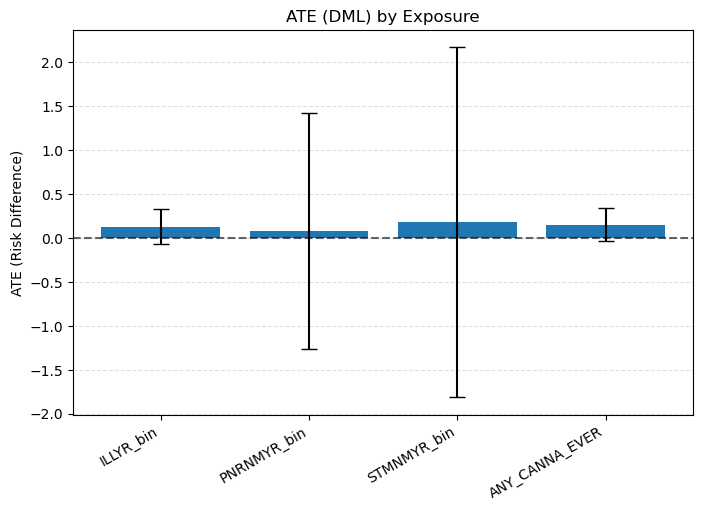

Saved: figures/ate_result.png


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%cd $ROOT

dml_df = pd.read_csv("results/ate_table_DML.csv")

# each exposure ATE and CI
exposures = dml_df["Exposure"]
ates = dml_df["ATE"]
lower = dml_df["95%CI_low"]
upper = dml_df["95%CI_high"]

# Distance between the upper and lower bounds and the point estimate
err_lower = ates - lower
err_upper = upper - ates
errors = [err_lower, err_upper]

plt.figure(figsize=(8, 5))
plt.bar(exposures, ates, yerr=errors, capsize=6)
plt.axhline(0, color="black", linestyle="--", alpha=0.6)

plt.ylabel("ATE (Risk Difference)")
plt.title("ATE (DML) by Exposure")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)

# saving
fig_path = Path("figures/ate_result.png")
fig_path.parent.mkdir(exist_ok=True)
plt.savefig(fig_path, dpi=300, bbox_inches="tight")

plt.show()
print("Saved:", fig_path)


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML


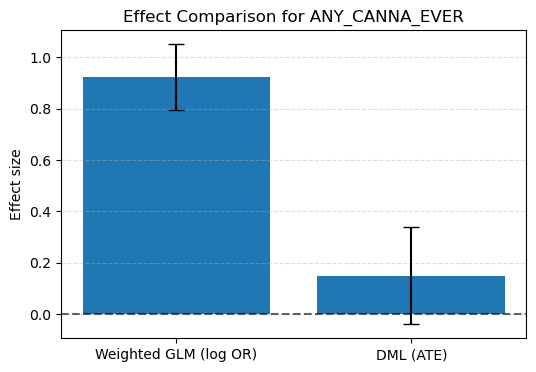

Saved: figures/ate_compare_any_canna.png


In [23]:
#GLM OR vs DML ATE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

%cd $ROOT

glm_df = pd.read_csv("results/ate_table_B_weighted_logit.csv")
dml_df = pd.read_csv("results/ate_table_DML.csv")

# 选定一个暴露，比如 ANY_CANNA_EVER
exposure_name = "ANY_CANNA_EVER"

row_glm = glm_df[glm_df["Exposure"] == exposure_name].iloc[0]
row_dml = dml_df[dml_df["Exposure"] == exposure_name].iloc[0]

# GLM: OR → log(OR)
or_val = row_glm["OR"]
or_low = row_glm["95%CI_low"]
or_high = row_glm["95%CI_high"]

log_or = np.log(or_val)
log_or_low = np.log(or_low)
log_or_high = np.log(or_high)

# DML: ATE
ate_val = row_dml["ATE"]
ate_low = row_dml["95%CI_low"]
ate_high = row_dml["95%CI_high"]

methods = ["Weighted GLM (log OR)", "DML (ATE)"]
values = [log_or, ate_val]
err_lower = [log_or - log_or_low, ate_val - ate_low]
err_upper = [log_or_high - log_or, ate_high - ate_val]
errors = [err_lower, err_upper]

plt.figure(figsize=(6,4))
plt.bar(methods, values, yerr=errors, capsize=6)
plt.axhline(0, linestyle="--", color="black", alpha=0.6)
plt.ylabel("Effect size")
plt.title(f"Effect Comparison for {exposure_name}")
plt.grid(axis="y", linestyle="--", alpha=0.4)

fig_path = Path("figures/ate_compare_any_canna.png")
fig_path.parent.mkdir(exist_ok=True)
plt.savefig(fig_path, dpi=300, bbox_inches="tight")

plt.show()
print("Saved:", fig_path)


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
    Exposure           Group         Level      CATE
0  ILLYR_bin       pregnancy           0.0  0.146097
1  ILLYR_bin       pregnancy           1.0  0.152644
2  ILLYR_bin  income_tercile  (0.999, 2.0]  0.162160
3  ILLYR_bin  income_tercile    (2.0, 3.0]  0.146624
4  ILLYR_bin  income_tercile    (3.0, 4.0]  0.116126


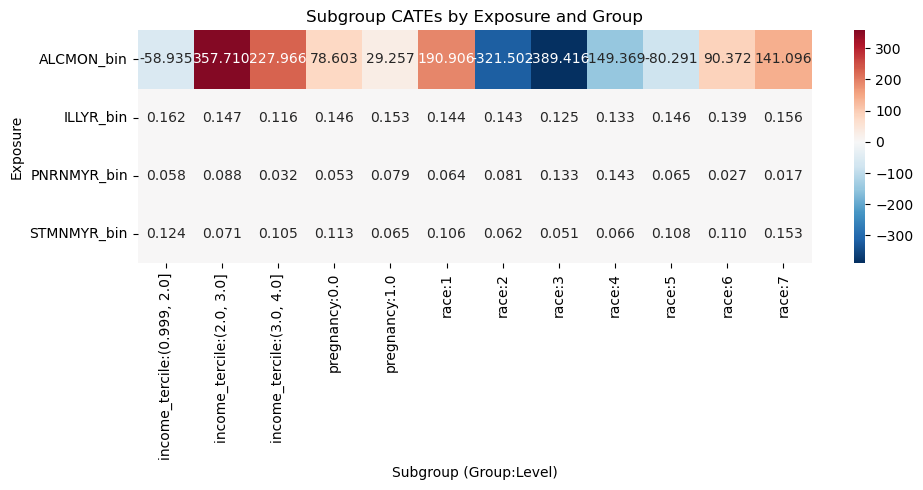

Saved: figures/cate_heatmap.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%cd $ROOT

cate = pd.read_csv("results/subgroup_ate_table.csv")
print(cate.head())

# combine Group and Level to column，like "pregnancy:0"
cate["Group_Level"] = cate["Group"].astype(str) + ":" + cate["Level"].astype(str)

# Exposure × Group_Level metric
heat_df = cate.pivot_table(
    index="Exposure",
    columns="Group_Level",
    values="CATE",
    aggfunc="mean"
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    heat_df,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0
)
plt.title("Subgroup CATEs by Exposure and Group")
plt.ylabel("Exposure")
plt.xlabel("Subgroup (Group:Level)")
plt.tight_layout()

fig_path = Path("figures/cate_heatmap.png")
fig_path.parent.mkdir(exist_ok=True)
plt.savefig(fig_path, dpi=300, bbox_inches="tight")

plt.show()
print("Saved:", fig_path)


/Users/zach/Downloads/Phd_Prerequisites/Paper/Code/NSDUH-2021-2023-CausalML
Columns in fairness_table: ['Exposure', 'Group', 'Level', 'Threshold', 'TPR', 'FPR', 'PPV', 'TPR_gap', 'FPR_gap', 'PPV_gap']


,Exposure,Group,Level,Threshold,TPR,FPR,PPV,TPR_gap,FPR_gap,PPV_gap
0,ILLYR_bin,IRPREG,0.0,0.2642,0.616736,0.351929,0.389237,0.016292,0.057313,-0.008949
1,ILLYR_bin,IRPREG,1.0,0.2642,0.584153,0.237304,0.407134,-0.016292,-0.057313,0.008949
2,ILLYR_bin,NEWRACE2,1.0,0.2642,0.729374,0.503474,0.391502,0.356265,0.268240,0.052125
3,ILLYR_bin,NEWRACE2,2.0,0.2642,0.392009,0.169288,0.346499,0.018900,-0.065946,0.007121
4,ILLYR_bin,NEWRACE2,3.0,0.2642,0.010482,0.005592,0.222005,-0.362626,-0.229642,-0.117372


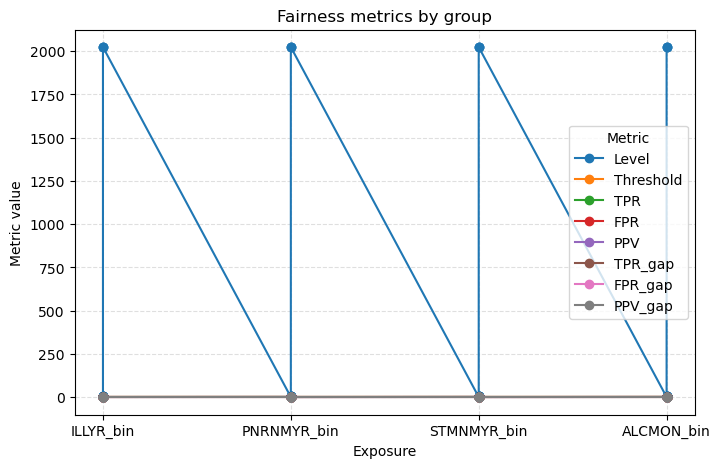

Saved: figures/fairness_plot.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%cd $ROOT

fair = pd.read_csv("results/fairness_table.csv")
print("Columns in fairness_table:", fair.columns.tolist())
display(fair.head())

# 默认：第一列是 group，其余数值列都是 metric
group_col = fair.columns[0]
metric_cols = [
    c for c in fair.columns
    if c != group_col and pd.api.types.is_numeric_dtype(fair[c])
]

plt.figure(figsize=(8, 5))
for m in metric_cols:
    plt.plot(fair[group_col], fair[m], marker="o", label=m)

plt.xlabel(group_col)
plt.ylabel("Metric value")
plt.title("Fairness metrics by group")
plt.legend(title="Metric")
plt.grid(True, linestyle="--", alpha=0.4)

fig_path = Path("figures/fairness_plot.png")
fig_path.parent.mkdir(exist_ok=True)
plt.savefig(fig_path, dpi=300, bbox_inches="tight")

plt.show()
print("Saved:", fig_path)
